In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [2]:
INPUT_FOLDER = "input/"
# INPUT_FOLDER = "../input" # for kaggle
print(os.listdir(INPUT_FOLDER))

['train_curated.csv', 'train_noisy.csv', 'sample_submission.csv', 'train_noisy', 'train_curated', 'test']


In [3]:
TRAIN_CURATED_PATH = INPUT_FOLDER + "train_curated.csv"
TRAIN_NOISY_PATH = INPUT_FOLDER + "train_noisy.csv"
SAMPLE_SUBMISSION_PATH = INPUT_FOLDER + "sample_submission.csv"
TRAIN_NOISY = INPUT_FOLDER + "train_noisy/"
TRAIN_CURATED = INPUT_FOLDER + "train_curated/"
TEST = INPUT_FOLDER + "test/"

train_noisy = pd.read_csv(TRAIN_NOISY_PATH)
train_curated = pd.read_csv(TRAIN_CURATED_PATH)
sample = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [4]:
target_names = sample.columns[1:]
num_targets = len(target_names)

src_dict = {target_names[i]:i for i in range(num_targets)}
src_dict_inv = {i:target_names[i] for i in range(num_targets)}

In [5]:
def one_hot(labels, src_dict):
    ar = np.zeros([len(labels), len(src_dict)])
    for i, label in enumerate(labels):
        label_list = label.split(',')
        for la in label_list:
            ar[i, src_dict[la]] = 1
    return ar

In [6]:
y_train = one_hot(train_curated['labels'], src_dict)

In [7]:
file_name = train_curated['fname'].values
file_name_noisy = train_noisy['fname'].values

In [8]:
i = 101

wavfile = TRAIN_CURATED + file_name[i]
y, sr = librosa.load(wavfile)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
X = (log_S +80) / 40 - 1

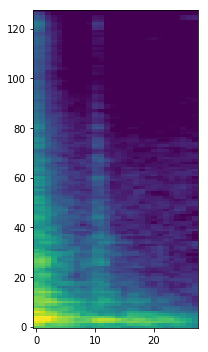

In [9]:
plt.figure(figsize=(3,5))
plt.imshow(X, aspect = "auto", origin = "lower")
plt.tight_layout()
plt.show()

In [10]:
i = 101

wavfile = TRAIN_NOISY + file_name_noisy[i]
y, sr = librosa.load(wavfile)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
X = (log_S +80) / 40 - 1

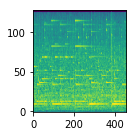

In [13]:
plt.figure(figsize=(2,2))
plt.imshow(X, aspect = "auto", origin = "lower")
plt.tight_layout()
plt.show()

In [39]:
len_div = 50
num_freq = X.shape[0]
num_div = X.shape[1] // len_div
num_pad = len_div - X.shape[1] % len_div
redidual_amp = np.zeros([num_freq, num_pad])
dum = np.hstack([X[:,len_div*num_div:], redidual_amp])

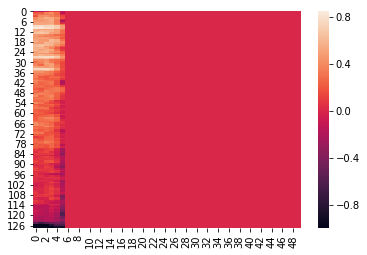

In [40]:
sns.heatmap(dum)
plt.show()